# Netflix Movies and TV Shows
#### Upgrade PIP 

In [ ]:
!pip install --upgrade pip

#### Install packages

In [ ]:
!pip install pandas
!pip install chardet
!pip install matplotlib
!pip install statsmodels

#### Import packages

In [32]:
import pandas as pd
import chardet as cd
import matplotlib.pyplot as plt

#### Detect encoding in the CSV file

In [15]:
with open('netflix_titles.csv','rb') as n:
    result = cd.detect(n.read())
print(result)

{'encoding': 'MacRoman', 'confidence': 0.7171563147575173, 'language': ''}


#### Read CSV file into Data Frame

In [213]:
netflix = pd.read_csv('netflix_titles.csv', encoding='MacRoman')
print(netflix.head())      #print the first five rows

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     90 min  ...         NaN   
1  September 24, 2021          2021  TV-MA  2 Season

In [21]:
print(netflix.info())   #print a summary of column non-missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [196]:
contentType_count = netflix['type'].value_counts()
rating_count = netflix['rating'].value_counts()
releaseYear_count =  netflix['release_year'].value_counts().sort_index()

In [197]:

total_content = contentType_count.sum()
contentType_percentages = contentType_count / total_content * 100

# Rating data for movie & tv show
movie_ratings = ['G', 'PG', 'PG-13', 'R', 'NC-17','NR','UR']
tv_ratings = ['TV-MA','TV-14','TV-PG','TV-Y7','TV-G','TV-Y7-FV']

# Reindex Movie & TV show counts to cover all ratings
movie_counts = netflix[netflix['type'] == 'Movie']['rating'].value_counts().reindex(rating_count.index, fill_value=0)
tv_show_counts = netflix[netflix['type'] == 'TV Show']['rating'].value_counts().reindex(rating_count.index, fill_value=0)

# Filter data for Movie & TV ratings
filtered_movie = movie_counts[movie_counts.index.isin(movie_ratings)]
filtered_tv = tv_show_counts[tv_show_counts.index.isin(tv_ratings)]

# Count Movie that uses TV Rating & TV that uses Movie Rating
moviecounts_tvratings = movie_counts[movie_counts.index.isin(tv_ratings)]
tvcounts_movieratings = tv_show_counts[tv_show_counts.index.isin(movie_ratings)]

# Combine counts of movie and TV show
combined_counts_movie = pd.concat([filtered_movie, tvcounts_movieratings], axis=1, keys=['Movie', 'TV Show'])
combined_counts_tv = pd.concat([filtered_tv, moviecounts_tvratings], axis=1, keys=['Movie', 'TV Show'])

# Normalize counts to percentages based on total_content
combined_counts_movie_percentage = combined_counts_movie.div(total_content/100)
combined_counts_tv_percentage = combined_counts_tv.div(total_content/100)

# Check combined counts percentage table for Movie & TV Rating
print(combined_counts_movie_percentage)
print(combined_counts_tv_percentage)



           Movie   TV Show
rating                    
R       9.047565  0.022704
PG-13   5.562493  0.000000
PG      3.258032  0.000000
NR      0.851402  0.056760
G       0.465433  0.000000
NC-17   0.034056  0.000000
UR      0.034056  0.000000
              Movie    TV Show
rating                        
TV-MA     13.009422  23.407878
TV-14      8.321035  16.199342
TV-PG      3.666705   6.130094
TV-Y7      2.213645   1.577932
TV-G       1.067090   1.430355
TV-Y7-FV   0.011352   0.056760


/var/folders/bk/qwt8gnq957vfvk4lbbqfs3qw0000gn/T/ipykernel_53851/3403582168.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(combined_counts_movie.index, rotation=45)
/var/folders/bk/qwt8gnq957vfvk4lbbqfs3qw0000gn/T/ipykernel_53851/3403582168.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(combined_counts_tv.index, rotation=45)


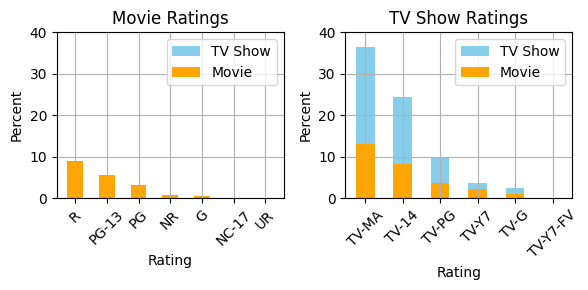

In [542]:
# Create a figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Plot bars for Movie ratings
ax[0].bar(combined_counts_movie_percentage.index, combined_counts_movie_percentage['TV Show'], bar_width, bottom=combined_counts_movie_percentage['Movie'], color='skyblue', label='TV Show')
ax[0].bar(combined_counts_movie_percentage.index, combined_counts_movie_percentage['Movie'], bar_width, color='orange', label='Movie')

# Plot bars for TV ratings
ax[1].bar(combined_counts_tv_percentage.index, combined_counts_tv_percentage['TV Show'], bar_width, bottom=combined_counts_tv_percentage['Movie'], color='skyblue', label='TV Show')
ax[1].bar(combined_counts_tv_percentage.index, combined_counts_tv_percentage['Movie'], bar_width, color='orange', label='Movie')

# Customize plot bars for Movie Rating chart
ax[0].set_title('Movie Ratings')
ax[0].set_xlabel('Rating')
ax[0].set_xticklabels(combined_counts_movie.index, rotation=45)
ax[0].set_ylabel('Percent')
ax[0].grid(True)
ax[0].legend()
ax[0].set_ylim(0, 40)

# Customize plot bars for TV Rating chart
ax[1].set_title('TV Show Ratings')
ax[1].set_xlabel('Rating')
ax[1].set_xticklabels(combined_counts_tv.index, rotation=45)
ax[1].set_ylabel('Percent')
ax[1].grid(True)
ax[1].legend()
ax[1].set_ylim(0, 40)

# Show the second plot
plt.tight_layout()
plt.show()

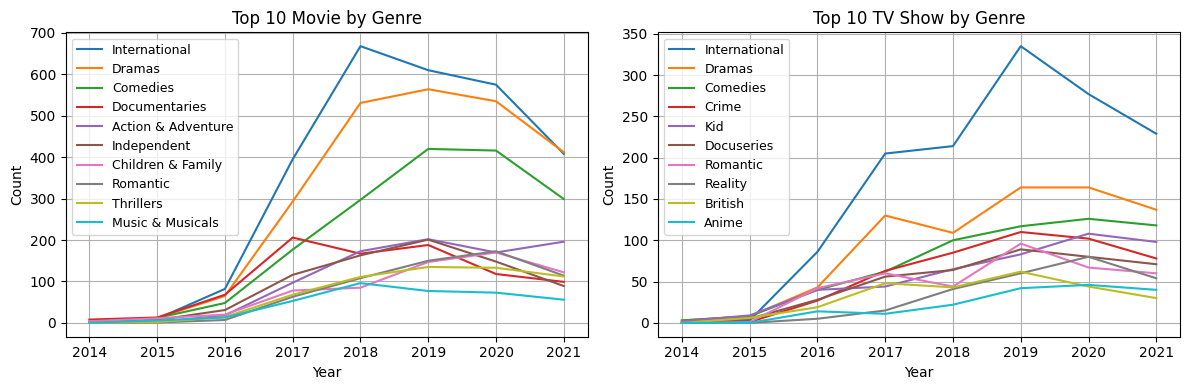

In [703]:
from datetime import datetime

# Create an empty dictionary to store genre counts
genre_counts_by_year = {}
genre_counts_by_year_tv = {}

# Iterate through the DataFrame
for index, row in netflix[(netflix['type'] == 'Movie') | (netflix['type'] == 'TV Show')].iterrows():
    # Check if 'date_added' is not NaN
    if not pd.isnull(row['date_added']):
        # Remove leading and trailing whitespace
        date_added = row['date_added'].strip()
        # Extract year from the 'date_added' column
        year = datetime.strptime(date_added, '%B %d, %Y').year
        genres = row['listed_in'].split(', ')
        
        # Update genre counts for the year
        if row['type'] == 'Movie':
            if year in genre_counts_by_year:
                for genre in genres:
                    genre_counts_by_year[year][genre] = genre_counts_by_year[year].get(genre, 0) + 1
            else:
                genre_counts_by_year[year] = {}
                for genre in genres:
                    genre_counts_by_year[year][genre] = 1

        elif row['type'] == 'TV Show':
            if year in genre_counts_by_year_tv:
                for genre in genres:
                    genre_counts_by_year_tv[year][genre] = genre_counts_by_year_tv[year].get(genre, 0) + 1
            else:
                genre_counts_by_year_tv[year] = {}
                for genre in genres:
                    genre_counts_by_year_tv[year][genre] = 1       

genres_df = pd.DataFrame(genre_counts_by_year).fillna(0)
genres_df_tv = pd.DataFrame(genre_counts_by_year_tv).fillna(0)

remove_year = [2008, 2009, 2010, 2011, 2012, 2013, 2024]

transposed_genres = genres_df.transpose().sort_index(axis=0).sort_index(axis=1).drop(remove_year, axis=0, errors='ignore')
transposed_genres_tv = genres_df_tv.transpose().sort_index(axis=0).sort_index(axis=1).drop(remove_year, axis=0, errors='ignore')

for genre, year_counts in transposed_genres.items():
    # removing 'Movies' from genre
    if genre.endswith(' Movies'):
        new_genre = genre.replace(' Movies', '')
        transposed_genres[new_genre] = transposed_genres.pop(genre)
        genre = new_genre  

for genre, year_counts in transposed_genres_tv.items():
    new_genre_tv = genre.replace('TV', '').replace(' Show', '').replace(' Series', '').replace(' s', '').replace(' Series', '').replace(' ','').replace("s'", "")
    transposed_genres_tv[new_genre_tv] = transposed_genres_tv.pop(genre)
    genre = new_genre_tv
        
sum_genre = transposed_genres.sum().sort_values(ascending=False).head(10)
sum_genre_tv = transposed_genres_tv.sum().sort_values(ascending=False).head(10)

final_genres = transposed_genres[sum_genre.index]
final_genres_tv = transposed_genres_tv[sum_genre_tv.index]

# Plotting multiple line graphs for movies and TV shows separately
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot final_genres for movies
for genre in final_genres.columns:
    axs[0].plot(final_genres.index, final_genres[genre], label=genre)

# Customize the first subplot (movies)
axs[0].set_title('Top 10 Movie by Genre')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')
axs[0].legend(fontsize=9)
axs[0].grid(True)

# Plot final_genres_tv for TV shows
for genre in final_genres_tv.columns:
    axs[1].plot(final_genres_tv.index, final_genres_tv[genre], label=genre)

# Customize the second subplot (TV shows)
axs[1].set_title('Top 10 TV Show by Genre')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Count')
axs[1].legend(fontsize=9)
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
